# WeRateDogs Data Wrangling Project
The dataset being used is a twitter archive of the Twitter user @dog_rates also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dogs. 

## Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering</a></li>
<li><a href="#asses">Assessing</a></li>
<li><a href="#quality">Quality</a></li>
<li><a href="#tidiness">Tidiness</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#analyse">Analysing and Vizualization</a></li>
<li><a href="#insight">Insights</a></li>
<li><a href="#ref">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
import time

<a id='gather'></a>
## Gathering

In [2]:
# load archive data
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# download the image prediction data
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

#Check the kind of data being fetched
print(r.headers.get('content-type'))

#Save the file
open('image_predictions.tsv', 'wb').write(r.content)

# read the .tsv in a datframe
image_predictions_df = pd.read_csv('image_predictions.tsv' ,sep='\t')
image_predictions_df.head()

text/tab-separated-values; charset=utf-8


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
#test tweepy

#auth = tweepy.OAuthHandler("CONSUMER_KEY", "CONSUMER_SECRET")
#auth.set_access_token("ACCESS_TOKEN", "ACCESS_TOKEN_SECRET")

# Authenticate to Twitter
auth = tweepy.OAuthHandler("**********","**********")
auth.set_access_token("**********", "**********")

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [5]:
# Use tweepy to extract retweets and likes
#**SIDE NOTE: DEL API KEYS B4 SUBMISSION**
    
# Authenticate to Twitter
CONSUMER_KEY = "**********"
CONSUMER_SECRET = "**********"
ACCESS_TOKEN = "**********"
ACCESS_TOKEN_SECRET = "**********"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = twitter_archive_df.tweet_id.values
tweet_ids = np.array(tweet_ids)
len(tweet_ids)

2356

In [7]:
count = 0
fails_dict = {}
start = time.time()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w', encoding='utf8') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json
            print("Success")
            json.dump(tweet, file)
            file.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(fails_dict)
print(end - start)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [8]:
tweet_json_list = []

start = time.time()

try:
    with open('tweet_json.txt', 'r') as file:
        for line in file:
            tweet = json.loads(line)
            
            #tweet id
            tweet_id = tweet['id_str']
            
            # number of likes in the tweet
            favorites = tweet['favorite_count']

            # number of retweets for the tweet
            retweets = tweet['retweet_count'] 

            #tweet's timestamp
            date_time = tweet['created_at']
            
            # append the fields
            tweet_json_list. append({'tweet_id': tweet_id,
                                    'favorites': favorites,
                                    'retweets': retweets,
                                    'date_time': date_time})
except FileNotFoundError:
    print("Oops! No such file")


end = time.time()
duration = end - start
print(duration)

0.16113018989562988


In [9]:
tweet_json_df = pd.DataFrame(tweet_json_list, columns=['tweet_id', 'favorites', 'retweets','date_time'])
tweet_json_df.head()

,tweet_id,favorites,retweets,date_time
0,892420643555336193,34856,7314,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,30195,5464,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,22733,3604,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,38132,7505,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,36396,8058,Sat Jul 29 16:00:24 +0000 2017


<a id='asses'></a>
## Assessing

### Assess `twitter_archive_df`

In [10]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
tweet_json_df

,tweet_id,favorites,retweets,date_time
0,892420643555336193,34856,7314,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,30195,5464,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,22733,3604,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,38132,7505,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,36396,8058,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2326,666049248165822465,92,38,Mon Nov 16 00:24:50 +0000 2015
2327,666044226329800704,258,121,Mon Nov 16 00:04:52 +0000 2015
2328,666033412701032449,105,39,Sun Nov 15 23:21:54 +0000 2015
2329,666029285002620928,117,41,Sun Nov 15 23:05:30 +0000 2015


In [13]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   object
 1   favorites  2331 non-null   int64 
 2   retweets   2331 non-null   int64 
 3   date_time  2331 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.0+ KB


In [16]:
twitter_archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
twitter_archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
#check for duplicates
twitter_archive_df.duplicated().sum()

0

In [19]:
image_predictions_df.duplicated().sum()

0

In [20]:
tweet_json_df.duplicated().sum()

0

In [21]:
# view basic statistical details
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
tweet_json_df.describe()

,favorites,retweets
count,2331.000000,2331.000000
mean,7279.827542,2572.969970
std,11308.447834,4352.377269
min,0.000000,1.000000
25%,1260.000000,522.000000
50%,3152.000000,1199.000000
75%,8895.500000,2979.000000
max,149760.000000,73826.000000


<a id='quality'></a>
#### Quality
**`twitter_archive_df` table**
- dataframe contains retweets.
- missing data in columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and `expanded_urls`.
- Incorrect datatype(`timestamp`,`retweeted_status_timestamp`,`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `rating_numerator` columns).
- Some entries have `rating_denominator` column has denominator more than 10.
- Some enties in both `rating_numerators` and `rating_denominator` are very large.
- Some entries in the `rating_numerator` and `rating_denominator` column are different from the extracted text
- Some rows are missing ratings.


**`image_prediction_df` table**
- missing entries - Has less enties than `twitter_archive_df` table.
- incorrect datatypes(p1,p2 and p3 columns).
- some entries do not have a dog breed.

**`tweet_json_df` table**
- missing entries - Has less enties than `twitter_archive_df` table.
- Incorrect datatype (`date_time` and `tweet_id` columns).

<a id='tidiness'></a>
#### Tidiness
- *date_time* column from `tweet_json_df` and *timestamp* column from `twitter_archive_df` have same content but diff column names.
- The dog stages, *doggo*, *floofer*, *pupper*, *puppo* are in four different columns in `twitter_archive_df` table.
- Some columns are not needed for analysis in all the 3 datasets.
- All the three tables belong to one table.
- Dataframe `image_prediction_df` has 3 different columns with possible dog breeds.

<a id='clean'></a>
## Clean

In [24]:
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
tweet_json_clean = tweet_json_df.copy()

### `twitter_archive_clean` Table

#### Define

- Use `retweeted_status_id` to delete retweets. Any row with content in this column or `retweeted_status_user_id` is a retweet

#### Code

In [25]:
# delete retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#### Test

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define
- Drop all the unnccessary columns from the table ('in_reply_to_status_id', 'in_reply_to_user_id', 'source','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls). This will also take care of the missing data in those columns.

#### Code

In [27]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source','retweeted_status_id',
                           'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls','name'], axis = 1, inplace = True)

#### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   doggo               2175 non-null   object
 6   floofer             2175 non-null   object
 7   pupper              2175 non-null   object
 8   puppo               2175 non-null   object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


#### Define
- Change `timestamp` to datetime and `rating_numerator` to float data types. 

#### Code

In [29]:
# change datatype to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')

#### Test

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   float64            
 4   rating_denominator  2175 non-null   int64              
 5   doggo               2175 non-null   object             
 6   floofer             2175 non-null   object             
 7   pupper              2175 non-null   object             
 8   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 169.9+ KB


#### Define
- Correct all the incorrect numerators to match the value in the text.

#### Code

In [31]:
# change the incorrect whole
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 666287406224695296) & (twitter_archive_clean['rating_numerator'] == 1), ['rating_numerator']] = 9
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 881633300179243008) & (twitter_archive_clean['rating_numerator'] == 17), ['rating_numerator']] = 13
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 835246439529840640) & (twitter_archive_clean['rating_numerator'] == 960), ['rating_numerator']] = 13
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 716439118184652801) & (twitter_archive_clean['rating_numerator'] == 50), ['rating_numerator']] = 11
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 722974582966214656) & (twitter_archive_clean['rating_numerator'] == 4), ['rating_numerator']] = 13
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 682962037429899265) & (twitter_archive_clean['rating_numerator'] == 7), ['rating_numerator']] = 10

#change incorrect floats
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 786709082849828864) & (twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 778027034220126208) & (twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 680494726643068929) & (twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 883482846933004288) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 681340665377193984) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 9.5


# one pic many dogs
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 731156023742988288) & (twitter_archive_clean['rating_numerator'] == 204), ['rating_numerator']] = 12
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 758467244762497024) & (twitter_archive_clean['rating_numerator'] == 165), ['rating_numerator']] = 11
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 677716515794329600) & (twitter_archive_clean['rating_numerator'] == 144), ['rating_numerator']] = 12
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 684225744407494656) & (twitter_archive_clean['rating_numerator'] == 143), ['rating_numerator']] = 11
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 684222868335505415) & (twitter_archive_clean['rating_numerator'] == 121), ['rating_numerator']] = 11
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 713900603437621249) & (twitter_archive_clean['rating_numerator'] == 99), ['rating_numerator']] = 11
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 675853064436391936) & (twitter_archive_clean['rating_numerator'] == 88), ['rating_numerator']] = 11
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 820690176645140481) & (twitter_archive_clean['rating_numerator'] == 84), ['rating_numerator']] = 12
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 710658690886586372) & (twitter_archive_clean['rating_numerator'] == 80), ['rating_numerator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 704054845121142784) & (twitter_archive_clean['rating_numerator'] == 60), ['rating_numerator']] = 12
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 709198395643068416) & (twitter_archive_clean['rating_numerator'] == 45), ['rating_numerator']] = 9
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 697463031882764288) & (twitter_archive_clean['rating_numerator'] == 44), ['rating_numerator']] = 11
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 686035780142297088) & (twitter_archive_clean['rating_numerator'] == 10), ['rating_numerator']] = 2


#### Test

In [32]:
twitter_archive_clean['rating_numerator'].value_counts()

12.00      504
10.00      444
11.00      433
13.00      310
9.00       158
8.00        98
7.00        53
14.00       43
5.00        34
6.00        32
3.00        19
4.00        16
2.00         9
1.00         7
0.00         2
420.00       2
11.26        1
9.75         1
13.50        1
666.00       1
24.00        1
15.00        1
1776.00      1
11.27        1
20.00        1
9.50         1
182.00       1
Name: rating_numerator, dtype: int64

#### Define
- Change the `rating_denominator` of incorrect all entries to 10.

#### Code

In [33]:
# change incorrect denoms
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 666287406224695296) & (twitter_archive_clean['rating_denominator'] == 2), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 681340665377193984) & (twitter_archive_clean['rating_denominator'] == 5), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 740373189193256964) & (twitter_archive_clean['rating_denominator'] == 11), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 716439118184652801) & (twitter_archive_clean['rating_denominator'] == 50), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 722974582966214656) & (twitter_archive_clean['rating_denominator'] == 20), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 682962037429899265) & (twitter_archive_clean['rating_denominator'] == 11), ['rating_denominator']] = 10


#the one pic many dog denom

twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 731156023742988288) & (twitter_archive_clean['rating_denominator'] == 170), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 758467244762497024) & (twitter_archive_clean['rating_denominator'] == 150), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 677716515794329600) & (twitter_archive_clean['rating_denominator'] == 120), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 684225744407494656) & (twitter_archive_clean['rating_denominator'] == 130), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 684222868335505415) & (twitter_archive_clean['rating_denominator'] == 110), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 713900603437621249) & (twitter_archive_clean['rating_denominator'] == 90), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 675853064436391936) & (twitter_archive_clean['rating_denominator'] == 80), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 820690176645140481) & (twitter_archive_clean['rating_denominator'] == 70), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 710658690886586372) & (twitter_archive_clean['rating_denominator'] == 80), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 704054845121142784) & (twitter_archive_clean['rating_denominator'] == 50), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 709198395643068416) & (twitter_archive_clean['rating_denominator'] == 50), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 697463031882764288) & (twitter_archive_clean['rating_denominator'] == 40), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 835246439529840640) & (twitter_archive_clean['rating_denominator'] == 0), ['rating_denominator']] = 10
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 686035780142297088) & (twitter_archive_clean['rating_denominator'] == 20), ['rating_denominator']] = 10


#### Test

In [34]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2172
15       1
7        1
16       1
Name: rating_denominator, dtype: int64

#### Define

- Drop the rows with ratings; 20/16, 24/7, 11/15 as they have no proper ratings.

#### Code

In [35]:
#drop the rows with no clear ratings
twitter_archive_clean.drop([342,516,1663], inplace=True)

#### Test

In [36]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2172
Name: rating_denominator, dtype: int64

#### Define TO BE LOOKED AT
- Melt the *'doggo'*, *'floofer'*, *'pupper'* and *'puppo'* columns into one column called *dog_stage*.

#### Code

In [37]:
#melt the columns and creat one column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp', 'text', 'rating_numerator',
                                                               'rating_denominator'],
                               value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name = 'dog_stage')

#drop the value column
twitter_archive_clean = twitter_archive_clean.drop('value', axis=1)

In [38]:
twitter_archive_clean['dog_stage'].value_counts()

pupper     2172
doggo      2172
floofer    2172
puppo      2172
Name: dog_stage, dtype: int64

In [39]:
dog_stage_classes = ['doggo', 'floofer', 'pupper', 'puppo']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    dclasses = pd.api.types.CategoricalDtype(ordered = False, categories = dog_stage_classes)
    twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype(dclasses)
else: # pre-v0.21
    twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category', ordered = False,
                                                         categories = dog_stage_classes)

#### Test

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688 entries, 0 to 8687
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8688 non-null   int64              
 1   timestamp           8688 non-null   datetime64[ns, UTC]
 2   text                8688 non-null   object             
 3   rating_numerator    8688 non-null   float64            
 4   rating_denominator  8688 non-null   int64              
 5   dog_stage           8688 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(2), object(1)
memory usage: 348.2+ KB


#### Define
- Drop the dog_stage column as the data is in correct.

#### Code

In [41]:
twitter_archive_clean.drop(['dog_stage'], axis=1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10
...,...,...,...,...,...
8683,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5.0,10
8684,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6.0,10
8685,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9.0,10
8686,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7.0,10


#### Test

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688 entries, 0 to 8687
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8688 non-null   int64              
 1   timestamp           8688 non-null   datetime64[ns, UTC]
 2   text                8688 non-null   object             
 3   rating_numerator    8688 non-null   float64            
 4   rating_denominator  8688 non-null   int64              
 5   dog_stage           8688 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(2), object(1)
memory usage: 348.2+ KB


### `image_predictions_df` Table

#### Define
- Delete the entries where there is no dog breed prediction.

#### Code

In [43]:
# dataframe with no dog breed prediction
wrong_breeds = image_predictions_clean[~image_predictions_clean.p1_dog & \
               ~image_predictions_clean.p2_dog & \
               ~image_predictions_clean.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']]
# print(wrong_breeds.info())
idx = list(wrong_breeds.index.values)

# drop the missing dogs dataframe
image_predictions_clean.drop(idx , inplace = True)

#### Test

In [44]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [45]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


#### Define
- Choose one dog breed out of the three using the highest confidence and save it in a different column.

#### Code

In [46]:
confidence = []  
dog_breed = []
real_breed = []

#Find the confidence and dog breeds   
for idx in image_predictions_clean.index:
    if ((image_predictions_clean['p1_conf'][idx] > image_predictions_clean['p2_conf'][idx]) & (image_predictions_clean['p1_conf'][idx] > image_predictions_clean['p3_conf'][idx])) & (image_predictions_clean['p1_dog'][idx] == True):
            confidence.append(image_predictions_clean['p1_conf'][idx])
            dog_breed.append(image_predictions_clean['p1'][idx])
    elif ((image_predictions_clean['p2_conf'][idx] > image_predictions_clean['p3_conf'][idx]) & (image_predictions_clean['p2_dog'][idx] == True)):
            confidence.append(image_predictions_clean['p2_conf'][idx])
            dog_breed.append(image_predictions_clean['p2'][idx])
    elif (image_predictions_clean['p3_dog'][idx] == True ):
            confidence.append(image_predictions_clean['p3_conf'][idx])
            dog_breed.append(image_predictions_clean['p3'][idx])
    else:
        print('dont know the error')
        
#convert the lists to numpy arrays
confidence = np.array(confidence)
dog_breed = np.array(dog_breed)

print(len(confidence))
print(len(dog_breed))
#print(len(errors))


print(len(image_predictions_clean))

#add these arrays to the dataframe as rows
image_predictions_clean['confidence'] = confidence
image_predictions_clean['dog_breed'] = dog_breed

1751
1751
1751


#### Test

In [47]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   int64  
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   p1          1751 non-null   object 
 4   p1_conf     1751 non-null   float64
 5   p1_dog      1751 non-null   bool   
 6   p2          1751 non-null   object 
 7   p2_conf     1751 non-null   float64
 8   p2_dog      1751 non-null   bool   
 9   p3          1751 non-null   object 
 10  p3_conf     1751 non-null   float64
 11  p3_dog      1751 non-null   bool   
 12  confidence  1751 non-null   float64
 13  dog_breed   1751 non-null   object 
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 249.3+ KB


In [48]:
image_predictions_clean.head(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,confidence,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.560311,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,0.651137,Bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,0.692517,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,0.007959,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,0.201493,miniature_poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,0.775930,golden_retriever


#### Define
We chose one column out of the three and saved the dog_breed column
- Correct the *dog_breed* column to be categorical.

#### Code

In [49]:
#get the dog_breeds
dog_breed_classes = image_predictions_clean.loc[:, "dog_breed"].to_list()

#remove any duplicates
dog_breed_classes = list(dict.fromkeys(dog_breed_classes))
dog_breed_classes = np.array(dog_breed_classes)
type(dog_breed_classes)

numpy.ndarray

In [50]:
len(dog_breed_classes)

113

In [51]:
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    dclasses = pd.api.types.CategoricalDtype(ordered = False, categories = dog_breed_classes)
    image_predictions_clean['dog_breed'] = image_predictions_clean['dog_breed'].astype(dclasses)
else: # pre-v0.21
    image_predictions_clean['dog_breed'] = image_predictions_clean['dog_breed'].astype('category', 
                                                                ordered = False, categories = dog_breed_classes)

#### Test

In [52]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tweet_id    1751 non-null   int64   
 1   jpg_url     1751 non-null   object  
 2   img_num     1751 non-null   int64   
 3   p1          1751 non-null   object  
 4   p1_conf     1751 non-null   float64 
 5   p1_dog      1751 non-null   bool    
 6   p2          1751 non-null   object  
 7   p2_conf     1751 non-null   float64 
 8   p2_dog      1751 non-null   bool    
 9   p3          1751 non-null   object  
 10  p3_conf     1751 non-null   float64 
 11  p3_dog      1751 non-null   bool    
 12  confidence  1751 non-null   float64 
 13  dog_breed   1751 non-null   category
dtypes: bool(3), category(1), float64(4), int64(2), object(4)
memory usage: 243.2+ KB


#### Define
- Drop *p1*, *p2*, *p3*, *p1_conf*, *p2_conf*, *p3_conf*, *p1_dog*, *p2_dog*, *p3_dog*.

#### Code

In [53]:
image_predictions_clean.drop(['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis=1, inplace=True)

#### Test

In [54]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tweet_id    1751 non-null   int64   
 1   jpg_url     1751 non-null   object  
 2   img_num     1751 non-null   int64   
 3   confidence  1751 non-null   float64 
 4   dog_breed   1751 non-null   category
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 156.0+ KB


#### Define
- Drop *jpg_url* from the dataset.

#### Code

In [55]:
# drop unncessary columns
image_predictions_clean.drop(['jpg_url'], axis=1, inplace=True)

#### Test

In [56]:
image_predictions_clean

,tweet_id,img_num,confidence,dog_breed
0,666020888022790149,1,0.465074,Welsh_springer_spaniel
1,666029285002620928,1,0.506826,redbone
2,666033412701032449,1,0.596461,German_shepherd
3,666044226329800704,1,0.408143,Rhodesian_ridgeback
4,666049248165822465,1,0.560311,miniature_pinscher
...,...,...,...,...
2069,891087950875897856,1,0.425595,Chesapeake_Bay_retriever
2070,891327558926688256,2,0.555712,basset
2071,891689557279858688,1,0.168086,Labrador_retriever
2072,891815181378084864,1,0.716012,Chihuahua


### `tweet_json_df` Table

#### Define
- Correct *tweet_id* datatype to int

#### Code

In [57]:
#change datatypes
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)
tweet_json_clean['date_time'] = pd.to_datetime(tweet_json_clean['date_time'])

#### Test

In [58]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2331 non-null   int64              
 1   favorites  2331 non-null   int64              
 2   retweets   2331 non-null   int64              
 3   date_time  2331 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.0 KB


#### Define 
- Change `tweet_json_clean`'s *date_time* column name to *datetime*.

#### Code

In [59]:
# rename the dataframe column
tweet_json_clean = tweet_json_clean.rename(columns={"date_time":"timestamp"})

#### Test

In [60]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2331 non-null   int64              
 1   favorites  2331 non-null   int64              
 2   retweets   2331 non-null   int64              
 3   timestamp  2331 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.0 KB


> After cleaning all the dataset individually,, we then have to combine all the datasets to one.

#### Define
- Join all the three tables to one. First combine `twitter_archive_clean` and `tweet_json_clean`. Then combine the results with `image_recognition_clean`

#### Code

In [61]:
# merge twitter_archive_clean and tweet_json_clean
df1 = pd.merge(twitter_archive_clean, tweet_json_clean, on = ['tweet_id', 'timestamp'], how = 'left')

In [62]:
# merge the new df with *image_recogition_clean*
rate_dogs_df = pd.merge(df1, image_predictions_clean, on=['tweet_id'], how = 'left')

#### Test

In [63]:
rate_dogs_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,favorites,retweets,img_num,confidence,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,doggo,34856.0,7314.0,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,doggo,30195.0,5464.0,1.0,0.323581,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,doggo,22733.0,3604.0,1.0,0.716012,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,doggo,38132.0,7505.0,1.0,0.168086,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,doggo,36396.0,8058.0,2.0,0.555712,basset


#### Define
- Drop any null rows in the dataframe.

#### Code

In [64]:
# drop rows with null values
rate_dogs_df.dropna(axis=0, how = 'any', inplace = True )

#### Test

In [65]:
rate_dogs_df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,favorites,retweets,img_num,confidence,dog_breed
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,doggo,30195.0,5464.0,1.0,0.323581,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,doggo,22733.0,3604.0,1.0,0.716012,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,doggo,38132.0,7505.0,1.0,0.168086,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,doggo,36396.0,8058.0,2.0,0.555712,basset
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10,doggo,18366.0,2703.0,1.0,0.425595,Chesapeake_Bay_retriever
...,...,...,...,...,...,...,...,...,...,...,...
8683,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5.0,10,puppo,92.0,38.0,1.0,0.560311,miniature_pinscher
8684,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6.0,10,puppo,258.0,121.0,1.0,0.408143,Rhodesian_ridgeback
8685,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9.0,10,puppo,105.0,39.0,1.0,0.596461,German_shepherd
8686,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7.0,10,puppo,117.0,41.0,1.0,0.506826,redbone


In [66]:
# Save the cleaned dataset as a csv file
rate_dogs_df.to_csv('twitter_archive_master.csv')

<a id='analyse'></a>
## Analysis and Vizualization

After assessing and cleaning our dataset, we can therefore go ahead and analyse it. Some of the question we want use to asses the dataset are:

- What are most common breed rated by WeRateDogs? Top 10.
- Is there a pair-wise relationship between retweets, favorites and the ratings given by the account?
- What is the relationship between retweets and fevorites?
- What is the relationship betweet ratings and retweets?
- What is the relationship betweet ratings and favorites?
- Is there a relationship between number of retweets, favorites and the ratings given by the account?
- What is the most common ratings given by the twitter account?

We are therefore going to do some exploratory visual analysis to try and answer these questions.

### Q1:  What are most common dog breeds rated by WeRateDogs? Top 10.

In [67]:
# Create a count function
def counter(column):
    
    #join all the entries in the column to a single string
    concat_str = rate_dogs_df[column].str.cat(sep='|')
    
    # Change the string to series
    sep_str = pd.Series(concat_str.split(sep='|'))
    
    return sep_str

In [68]:
# Store the series in a dataframe 
dog_breed_df = counter('dog_breed').to_frame('dog_breed')

#Get the unique values
dog_breed_df = dog_breed_df['dog_breed'].value_counts().to_frame('dog_breed').reset_index()

#rename columns
dog_breed_df = dog_breed_df.rename(columns={'index':'dog_breed','dog_breed':'dog_num'})

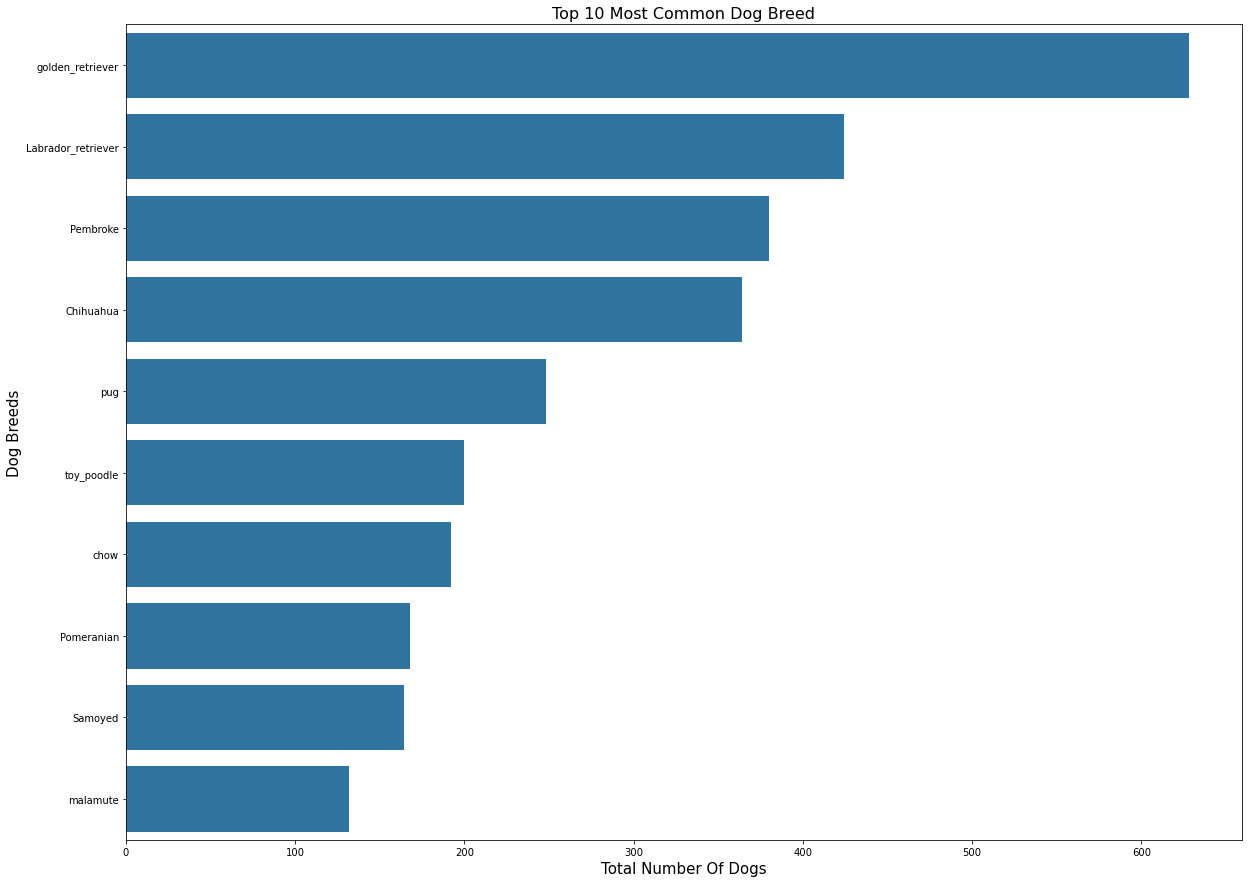

In [69]:
#Cut the first 10 dog breeds
new_dog_breed = dog_breed_df.iloc[:10]

#Set color for the bar graph
base_color = sns.color_palette()[0]
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize = fig_dims)

#Plot the bargraph
sns.barplot(data = new_dog_breed, x = 'dog_num', y = 'dog_breed', color = base_color, ax = ax);

#Set the title and axes
plt.title("Top 10 Most Common Dog Breed", fontsize=16);
plt.xlabel("Total Number Of Dogs",fontsize=15);
plt.ylabel("Dog Breeds",fontsize= 15);
plt.savefig('dbreed.png');

### Q2: Is there a pair-wise relationship between retweets, likes, rating?

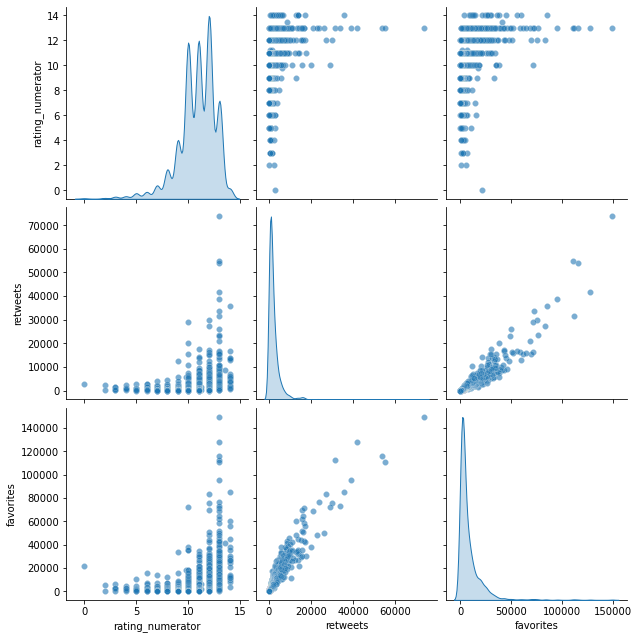

In [70]:
sns.pairplot(rate_dogs_df, vars = ['rating_numerator', 'retweets', 'favorites'],
            plot_kws = {'alpha' : 1/5},diag_kind = 'kde', height = 3);

### Q3: What is the relationship between retweets and favorites?

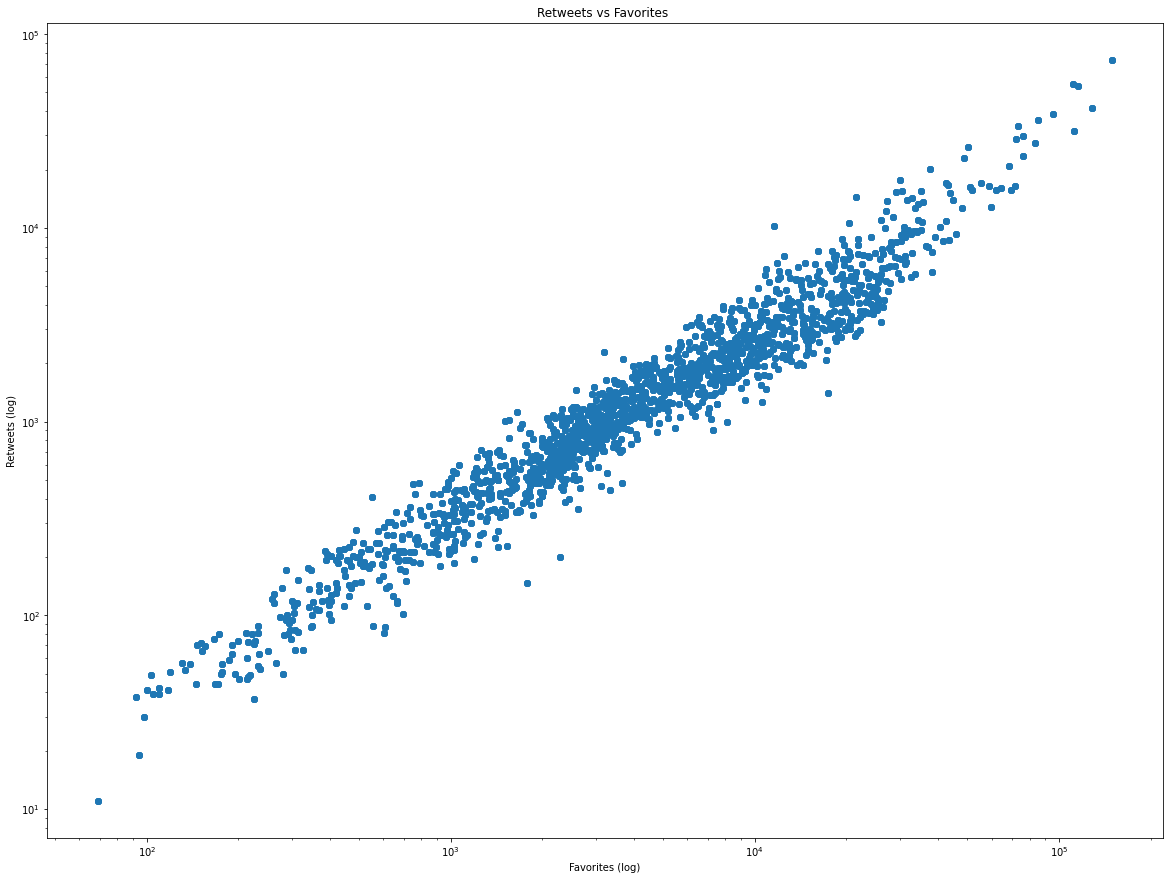

In [71]:
#set the scales
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize = fig_dims)
plt.xscale('log');
plt.yscale('log');
#plot 
plt.scatter(data = rate_dogs_df, x = 'favorites', y = 'retweets' );
plt.title('Retweets vs Favorites ');
plt.xlabel('Favorites (log)');
plt.ylabel('Retweets (log)');
plt.savefig('retwfav.png');

### Q4: What is the relationship betweet ratings and retweets?

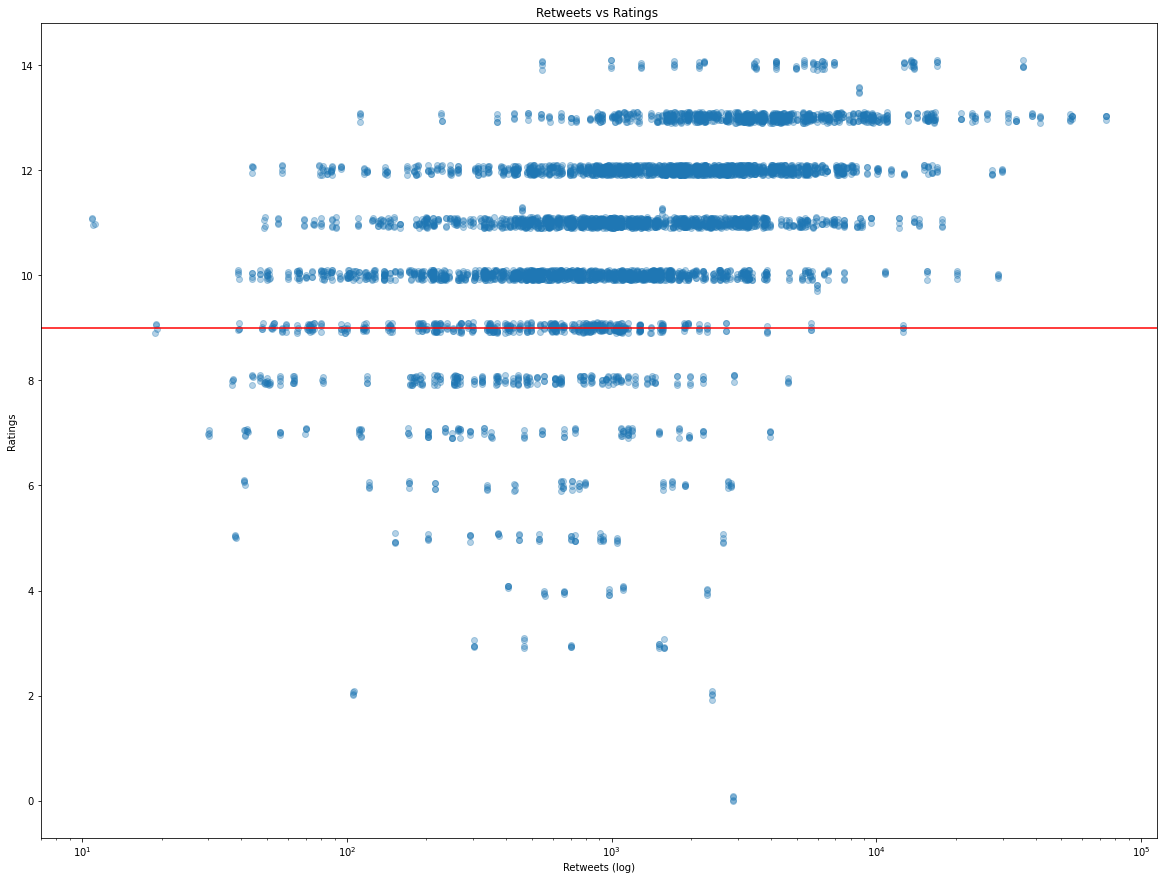

In [72]:
#set the scales
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize = fig_dims)
plt.xscale('log');

#plot 
sns.regplot(data = rate_dogs_df, x = 'retweets', y = 'rating_numerator', fit_reg = False, 
          x_jitter=0.2, y_jitter=0.1, scatter_kws = {'alpha': 1/3});

plt.axhline(y = 9, color = 'r');
plt.title('Retweets vs Ratings ');
plt.xlabel('Retweets (log)');
plt.ylabel('Ratings');
plt.savefig('rr.png')

### Q5: What is the relationship betweet ratings and favorites?

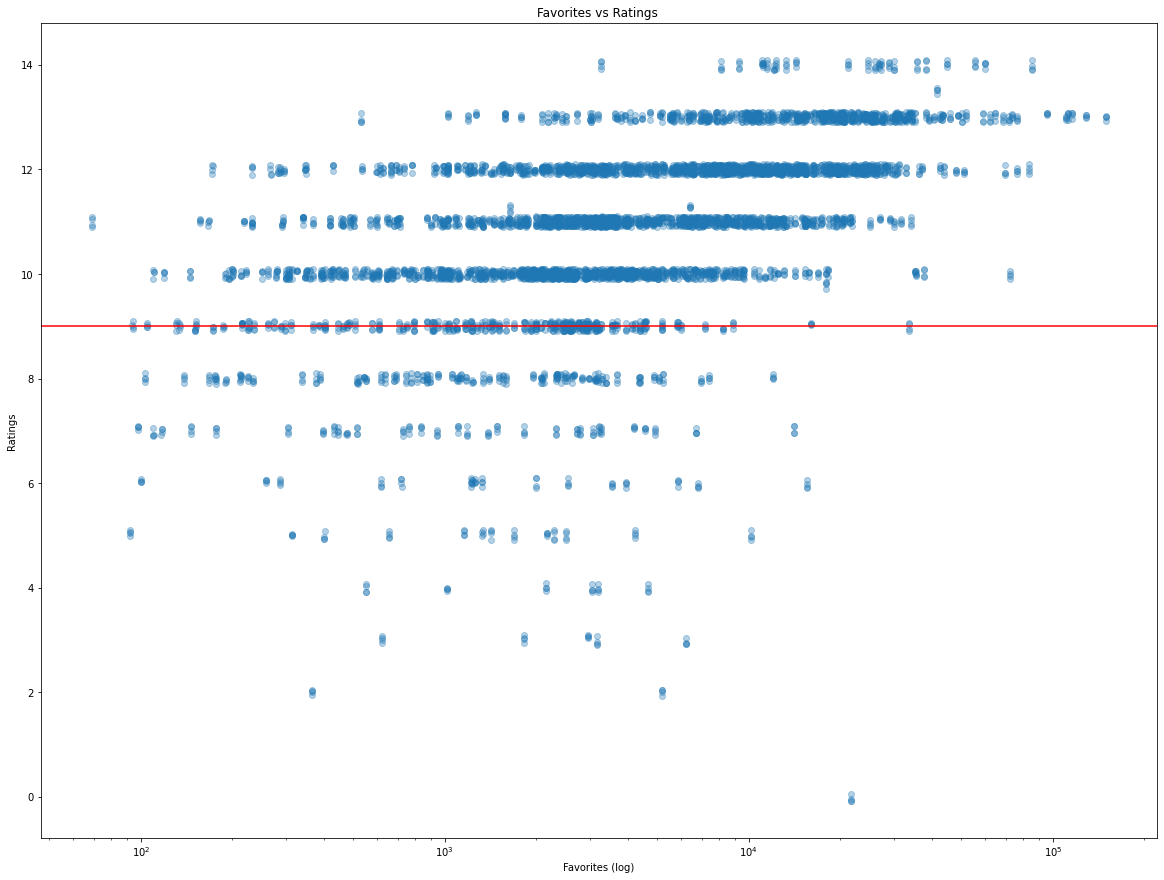

In [73]:
#set the scales
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize = fig_dims)
plt.xscale('log');

#plot 
sns.regplot(data = rate_dogs_df, x = 'favorites', y = 'rating_numerator', fit_reg = False, 
          x_jitter=0.2, y_jitter=0.1, scatter_kws = {'alpha': 1/3});
plt.axhline(y = 9, color = 'r');
plt.title('Favorites vs Ratings ');
plt.xlabel('Favorites (log)');
plt.ylabel('Ratings');
plt.savefig('rf.png');

### Q4:Is there a relationship between number of retweets, likes and the ratings given by the account?

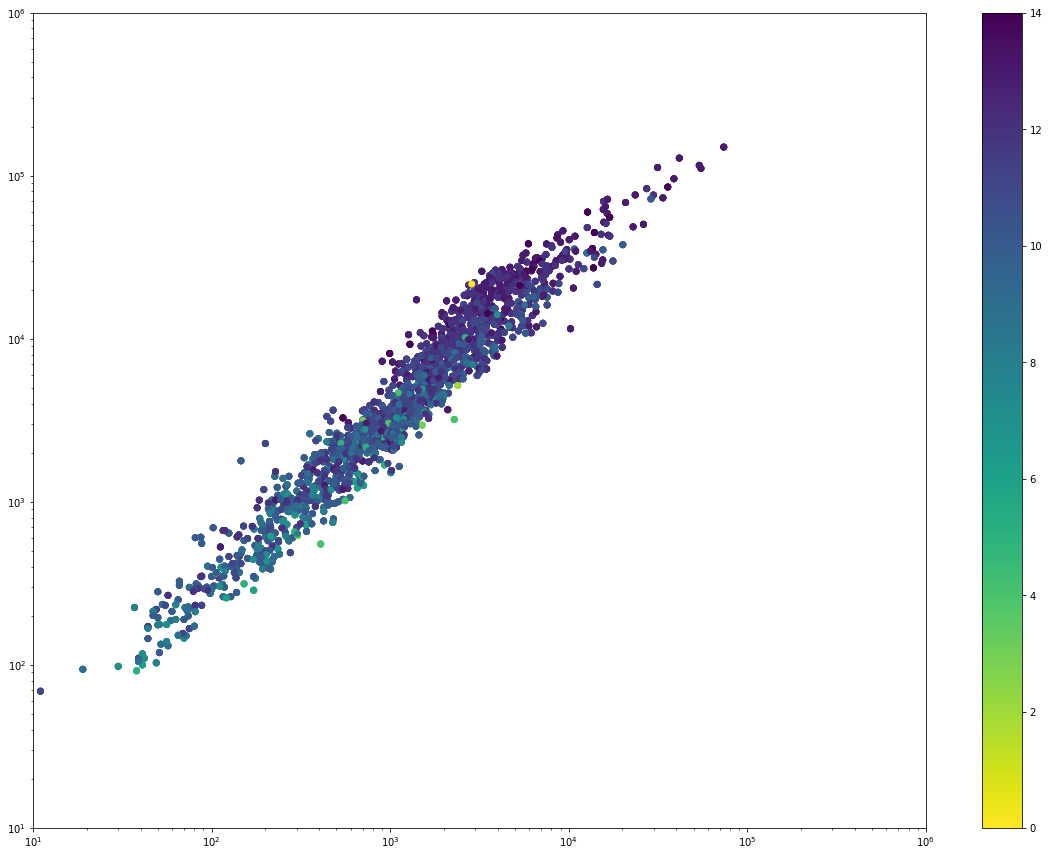

In [74]:
#Set dimension size
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10 , 1000000)
plt.ylim(10, 1000000)

#plot 
plt.scatter(data = rate_dogs_df, x = 'retweets', y = 'favorites', c = 'rating_numerator', cmap = 'viridis_r');
plt.colorbar();
plt.savefig('rrf.png')

### Q5: What is the most common ratings given by the twitter account?

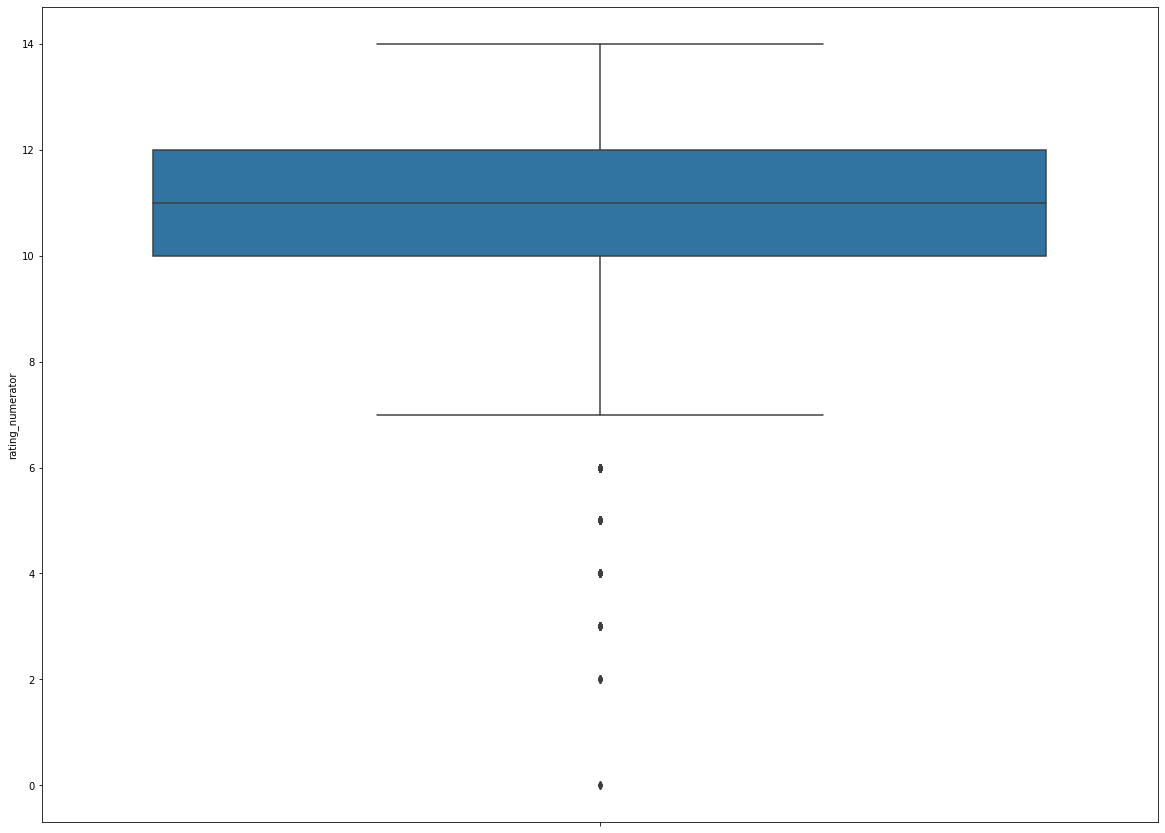

In [75]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize = fig_dims)

sns.set_style("whitegrid")
ax = sns.boxplot(y =rate_dogs_df['rating_numerator'])
plt.savefig('b_rating')

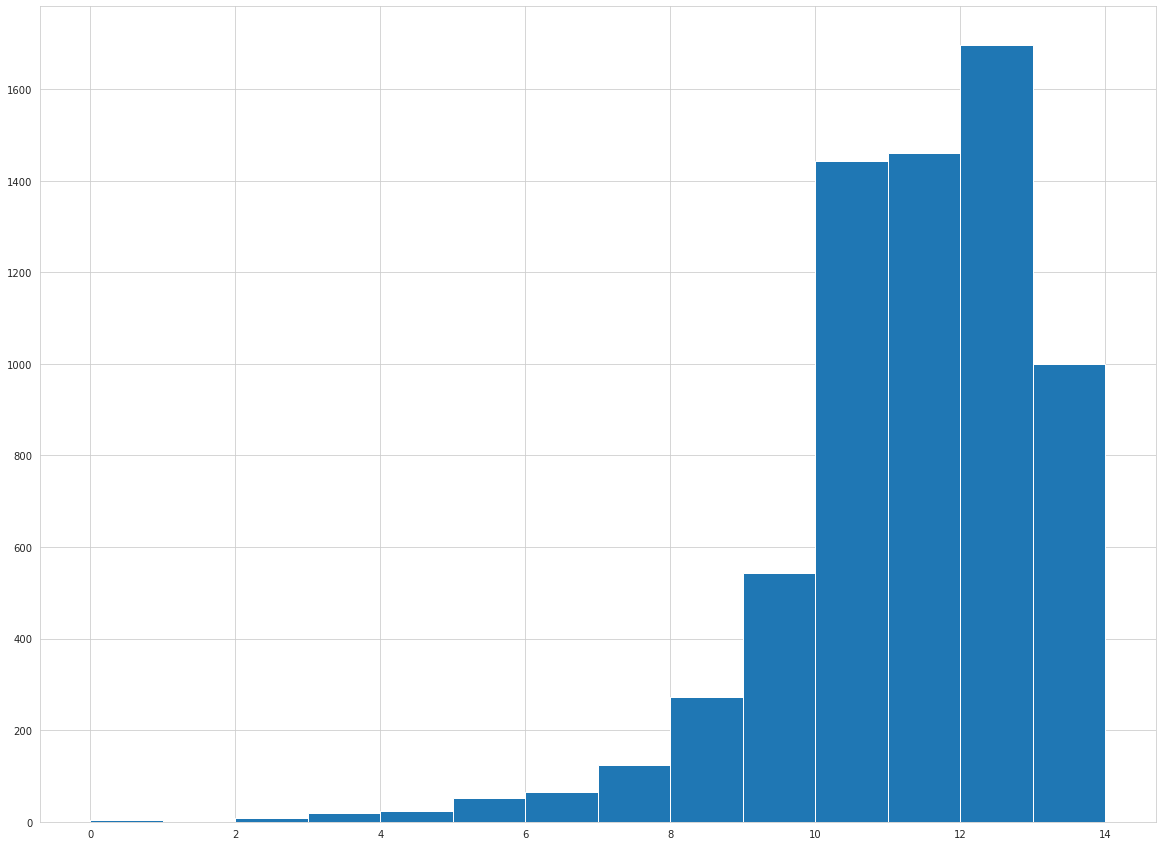

In [76]:
#use histogram
#set size
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize = fig_dims)

bins = np.arange(0, rate_dogs_df['rating_numerator'].max()+1, 1);
plt.hist(data = rate_dogs_df, x = 'rating_numerator', bins = bins);
plt.savefig('h_rating.png')

<a id='insight'></a>
## Conclusions

After analysis of our cleaned dataset, the following conclutions were drawn:
- Retweets and favorites have a strong positive correlation. This means that the as the number of retweets increase so does the number of favorites.
- Dogs that have a high ratings tends to have more retwwets and favorites.
- Highly rated dogs have a high number retweets.
- Highly rated dogs have a high number favorites.
- The rating with the highest number of dogs is 13.

<a id='ref'></a>
## Reference

[Pandas Documentation]("https://pandas.pydata.org/docs/user_guide/")

[Numpy Documentation]("https://numpy.org/doc/stable/user/")

[Seaborn Documentation]("https://seaborn.pydata.org/tutorial.html")

[Matplotlib Documentation]("https://matplotlib.org/3.2.1/tutorials/index.html")

[Github]("https://github.com/stephanderton/We-Rate-Dogs-Data-Wrangling-Project")
